Exploratory Data Analysis on Titanic Data Set

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

Loading the Data

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Value Visualization using Seaborn

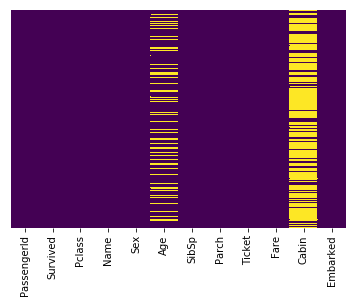

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

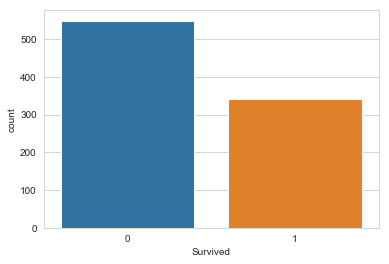

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

We can see from the plot above that our data is imbalanced and many people have not survived. Lets observe if this column is affected by other factors.

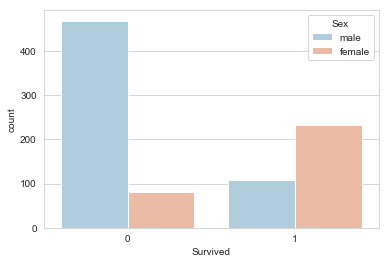

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')    

We can assume that women and children were evacuated first from the ship and hence survival rate for female is more as compared to male. Now let us see what effect does the passenger class column have on the survival rate

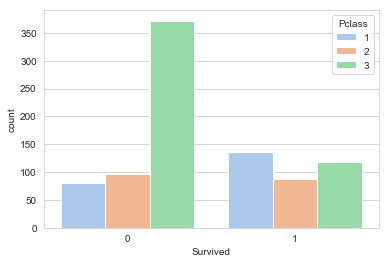

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='pastel')

It can be clearly seen that majority of the passengers in class three did not survive.

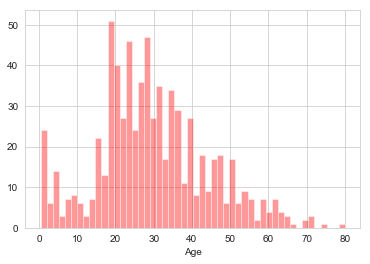

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, color='red', bins=50)

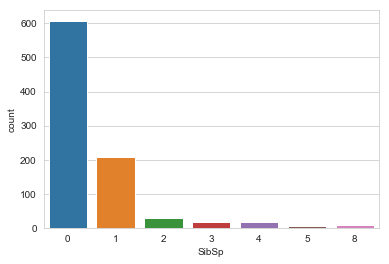

In [9]:
sns.countplot(x='SibSp', data=train)

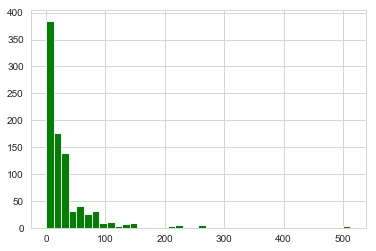

In [10]:
train['Fare'].hist(color='green', bins=40)

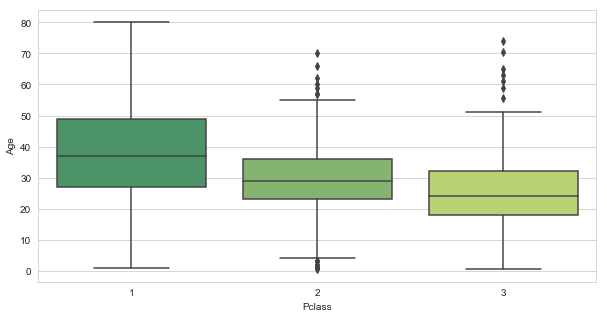

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=train, palette='summer')

Creating a Function to impute Age data with the help of above box plot

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age

In [13]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [15]:
train.drop('Cabin', axis=1, inplace=True)

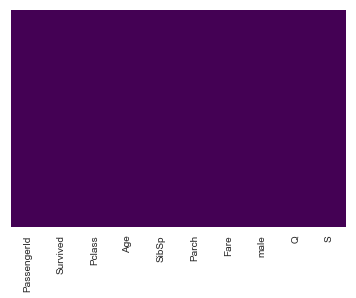

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Dummy Encoding the Categorical Variables

In [18]:
embarked=pd.get_dummies(train['Embarked'], drop_first=True)

In [19]:
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [20]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [22]:
train = pd.concat([train, sex, embarked], axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Lets use Logistic Regression to predict the Survival

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                   train['Survived'], test_size=0.30,
                                                        random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
predictions = model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, predictions)

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, predictions)

0.7761194029850746